## Outline of capstone project: New York Airbnb data analysis
### 1. Importing module
### 2. Loading dataset
### 3.Cleaning the data
### 4. Visulaizing the data
### 5. building the model for regression analysis

### Importing module

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.svm import SVC
import seaborn as sns

### Loading the data

In [111]:
data=pd.read_csv('airbnb.csv')
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,10/19/18,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,5/21/19,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,7/5/19,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,11/19/18,0.10,1,0


#### The data has 16 columns and 48895 rows.

### Data cleaning

In [3]:
data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [112]:
#drop unnecessary columns
data.drop(['last_review', 'reviews_per_month'], axis=1, inplace=True)
data.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0


In [5]:
#find out how many unique value in neighbourhood group
data.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [6]:
nb=data.neighbourhood.unique()

array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Asto

In [126]:
nb.count()

BoroCode      195
BoroName      195
the_geom      195
CountyFIPS    195
NTACode       195
NTAName       195
Shape_Leng    195
Shape_Area    195
geom          195
dtype: int64

#### New York City has 195 neighbourhood.

In [7]:
data.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

### Visualize the data

#### Identify the host with most listings

In [8]:
top_host=data.host_id.value_counts().head(10)
top_host

219517861    327
107434423    232
30283594     121
137358866    103
12243051      96
16098958      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: host_id, dtype: int64

#### The host_Id '219517861' host for 327 times, which is the toppest host. The top ten counts range from 327 to 52.

[Text(0, 0, '219517861'),
 Text(0, 0, '107434423'),
 Text(0, 0, '30283594'),
 Text(0, 0, '137358866'),
 Text(0, 0, '12243051'),
 Text(0, 0, '16098958'),
 Text(0, 0, '61391963'),
 Text(0, 0, '22541573'),
 Text(0, 0, '200380610'),
 Text(0, 0, '7503643')]

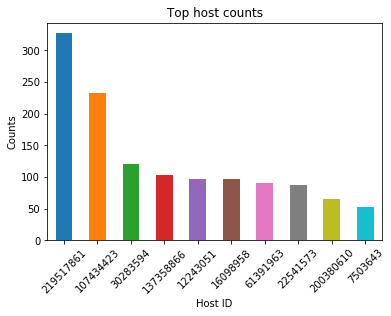

In [11]:
fig_1=top_host.plot(x='host_id', y='counts', kind='bar')
fig_1.set_title('Top host counts')
fig_1.set_xlabel('Host ID')
fig_1.set_ylabel('Counts')
fig_1.set_xticklabels(fig_1.get_xticklabels(), rotation=45)

#### Identify the listings price distribution between different neighbourhood_group.

In [15]:
import geopandas as gpd
from shapely import wkt
import os

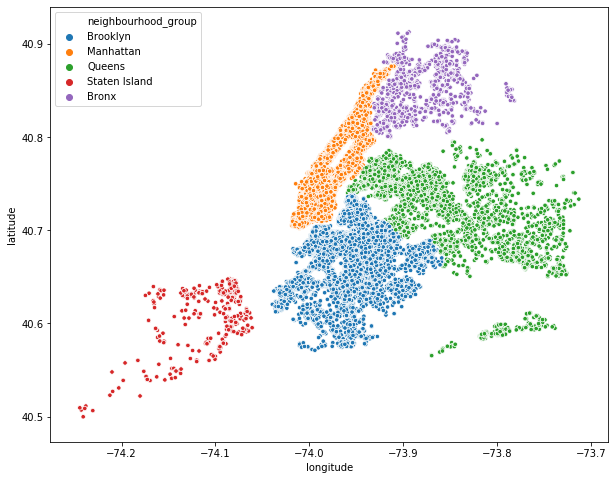

In [16]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='longitude', y='latitude', hue='neighbourhood_group', s=20, data=data)

#### This figure indicates the actual distribution trend in the five neighbourhood_group.

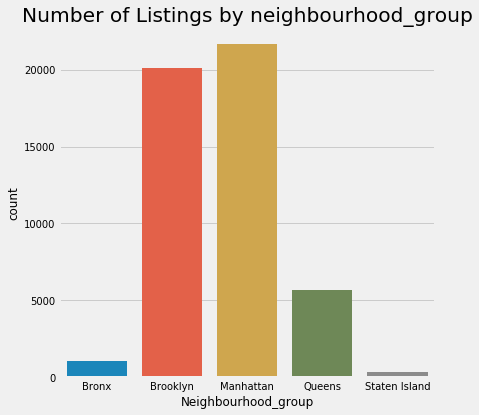

In [25]:
ng_count=data.groupby('neighbourhood_group').agg('count').reset_index()
#plot the counts
fig, ax1=plt.subplots(1,1,figsize=(6,6))
sns.barplot(x='neighbourhood_group', y='id', data=ng_count, ax=ax1)
ax1.set_title('Number of Listings by neighbourhood_group')
ax1.set_xlabel('Neighbourhood_group',fontsize=12)
ax1.set_ylabel('count', fontsize=12)
ax1.tick_params(axis='both', labelsize=10)

#### The neighbourhood_group"manhattan" exhibited the highest number of listings; 'Staten Island" exhibited the least number.

In [19]:
#Geopandas brings in the NYC map.
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

plt.style.use('fivethirtyeight')

In [31]:
nyc = gpd.read_file(gpd.datasets.get_path('nybb'))
nyc.head(5)

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,5,Staten Island,330470.010332,1.623820e+09,(POLYGON ((970217.0223999023 145643.3322143555...
1,4,Queens,896344.047763,3.045213e+09,(POLYGON ((1029606.076599121 156073.8142089844...
2,3,Brooklyn,741080.523166,1.937479e+09,(POLYGON ((1021176.479003906 151374.7969970703...
3,1,Manhattan,359299.096471,6.364715e+08,(POLYGON ((981219.0557861328 188655.3157958984...
4,2,Bronx,464392.991824,1.186925e+09,(POLYGON ((1012821.805786133 229228.2645874023...


In [32]:
nyc.rename(columns={'BoroName':'neighbourhood_group'}, inplace=True)

In [33]:
bc_geo = nyc.merge(ng_count, on="neighbourhood_group")

(905464.739038086, 1075092.8783935548, 112485.76063504723, 280480.4142594267)

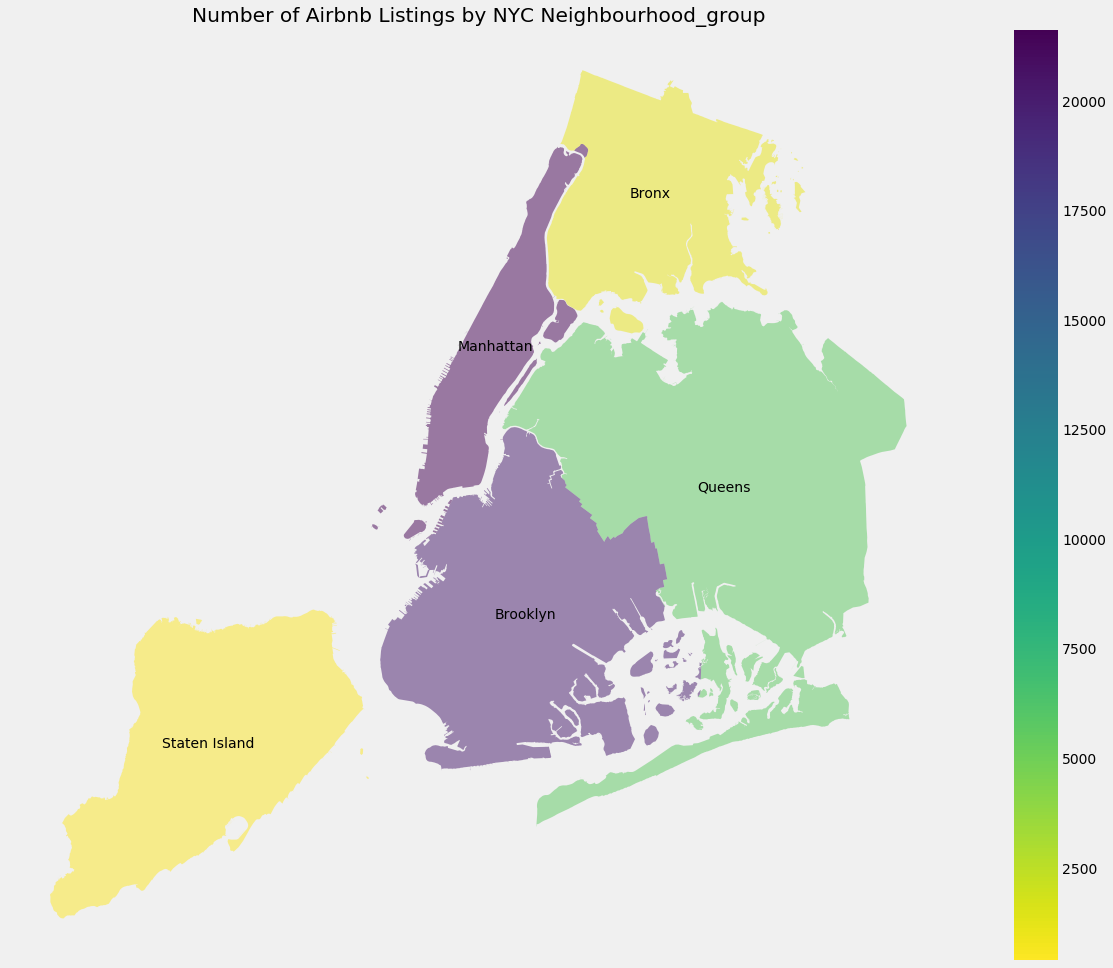

In [36]:
#plot it
import descartes
from matplotlib.collections import PatchCollection
fig, ax=plt.subplots(1,1,figsize=(20,16))
bc_geo.plot(column='id', cmap='viridis_r', alpha=0.5, ax=ax, legend=True)
bc_geo.apply(lambda x:ax.annotate(s=x.neighbourhood_group, color='black', xy=x.geometry.centroid.coords[0], ha='center'), axis=1)
plt.title('Number of Airbnb Listings by NYC Neighbourhood_group')
plt.axis('off')

Text(0.5, 1.0, 'Room type distribution')

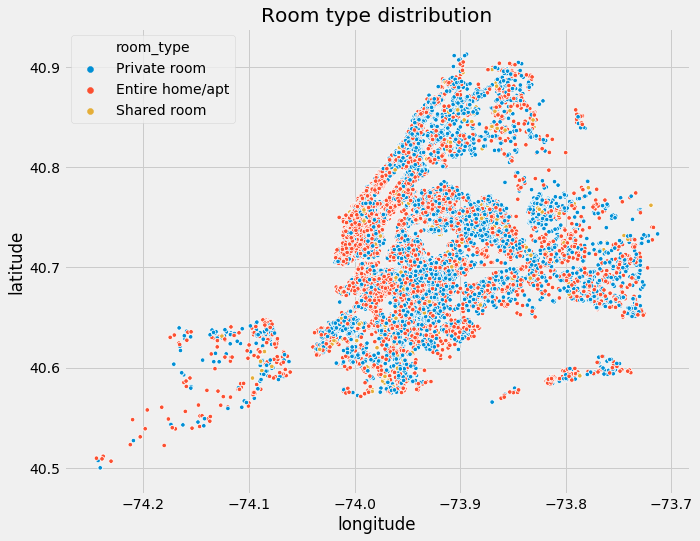

In [41]:
plt.figure(figsize=(10,8))
rt=sns.scatterplot(x='longitude', y='latitude', hue='room_type', s=20, data=data)
rt.set_title('Room type distribution')

Text(0.5, 1.0, 'Room Type Counts')

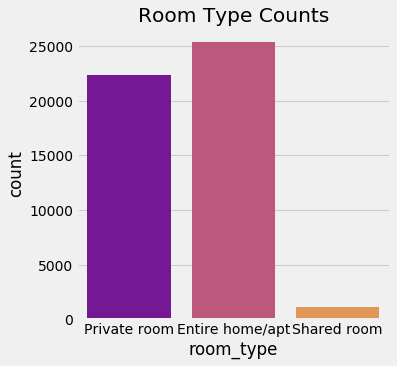

In [43]:
sns.countplot(data['room_type'], palette='plasma')
rt2=plt.gcf()
rt2.set_size_inches(5,5)
plt.title('Room Type Counts')

#### Most airbnb are entire home/apt, more than 50%.

### Draw the price map

In [61]:
#remove the extreme value to help the figure visualize clearly.
data1=data[data.price<500]

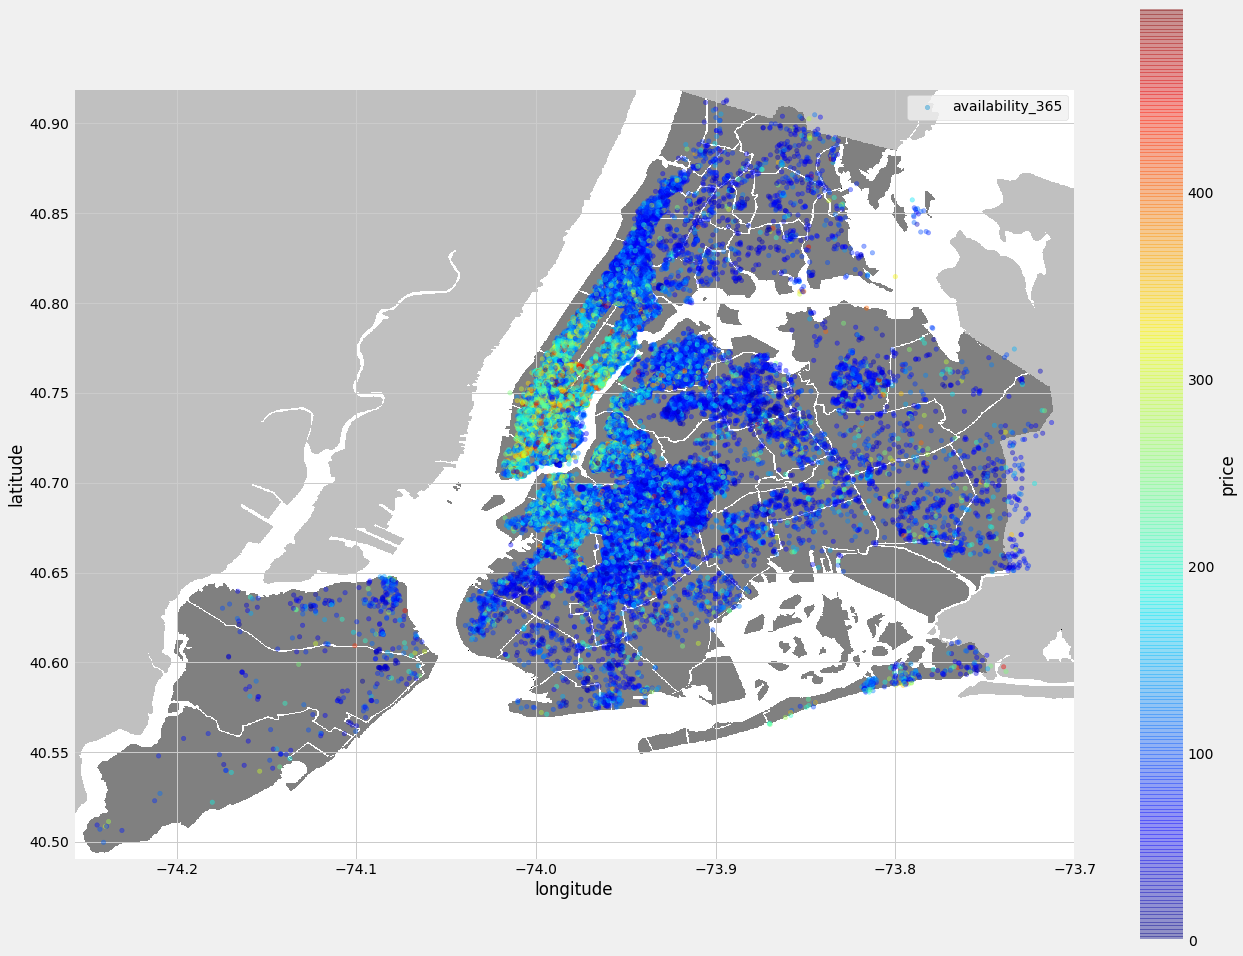

In [62]:
import urllib
plt.figure(figsize=(20,16))
#loading the NYC image
i=urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG')
nyc_img=plt.imread(i)
#scaling the image based on latitude and longitude
plt.imshow(nyc_img, zorder=0, extent=[-74.258, -73.7,40.49, 40.92])
ax=plt.gca()
#using scatterplot again
data1.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price', ax=ax, 
           cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, zorder=5)
plt.legend()
plt.show()

#### Comments: The yellow and red dots mostly distributes in neighbourhood_group "Manhattan", which indicates Manhattan owns the more expensive airbnb rooms when compared with the other neighbourhood_group.

Text(0.5, 1.0, 'Density and distribution of prices for each neighberhood_group')

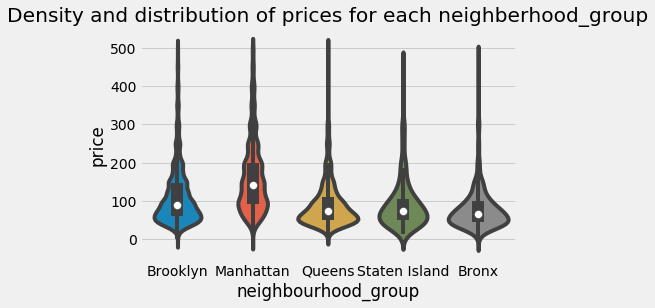

In [59]:
nh_price=sns.violinplot(data=data1,x='neighbourhood_group',y='price',figsize=(20,16))
nh_price.set_title('Density and distribution of prices for each neighberhood_group')

#### Combined the pmap and the violin figure, the distribtuion of prices for airbnb in NYC has indicated that Neighbourhood_group 'Manhattan' has the highest price at average 150, then is Brooklyn with 90. The Bronx is the cheapest one with 65$.

### The distribution trend of neighbourhood.

In [45]:
# file 'nynta.csv' from Internet
nb=pd.read_csv('nynta.csv')
nb.head(5)

,BoroCode,BoroName,the_geom,CountyFIPS,NTACode,NTAName,Shape_Leng,Shape_Area
0,3,Brooklyn,MULTIPOLYGON (((-73.97604935657381 40.63127590...,47,BK88,Borough Park,39247.227831,5.400502e+07
1,4,Queens,MULTIPOLYGON (((-73.80379022888098 40.77561011...,81,QN51,Murray Hill,33266.904797,5.248828e+07
2,4,Queens,MULTIPOLYGON (((-73.8610972440186 40.763664477...,81,QN27,East Elmhurst,19816.712074,1.972685e+07
3,4,Queens,MULTIPOLYGON (((-73.75725671509139 40.71813860...,81,QN07,Hollis,20976.335574,2.288777e+07
4,1,Manhattan,MULTIPOLYGON (((-73.94607828674226 40.82126321...,61,MN06,Manhattanville,17040.685413,1.064708e+07


In [48]:
#apply the geometry.
nb['geom']=nb['the_geom'].apply(wkt.loads)
nb=gpd.GeoDataFrame(nb, geometry='geom')
nb.head(5)

,BoroCode,BoroName,the_geom,CountyFIPS,NTACode,NTAName,Shape_Leng,Shape_Area,geom
0,3,Brooklyn,MULTIPOLYGON (((-73.97604935657381 40.63127590...,47,BK88,Borough Park,39247.227831,5.400502e+07,(POLYGON ((-73.97604935657381 40.6312759056467...
1,4,Queens,MULTIPOLYGON (((-73.80379022888098 40.77561011...,81,QN51,Murray Hill,33266.904797,5.248828e+07,(POLYGON ((-73.80379022888098 40.7756101122950...
2,4,Queens,MULTIPOLYGON (((-73.8610972440186 40.763664477...,81,QN27,East Elmhurst,19816.712074,1.972685e+07,(POLYGON ((-73.86109724401859 40.7636644770877...
3,4,Queens,MULTIPOLYGON (((-73.75725671509139 40.71813860...,81,QN07,Hollis,20976.335574,2.288777e+07,(POLYGON ((-73.75725671509139 40.7181386016625...
4,1,Manhattan,MULTIPOLYGON (((-73.94607828674226 40.82126321...,61,MN06,Manhattanville,17040.685413,1.064708e+07,(POLYGON ((-73.94607828674226 40.8212632160619...


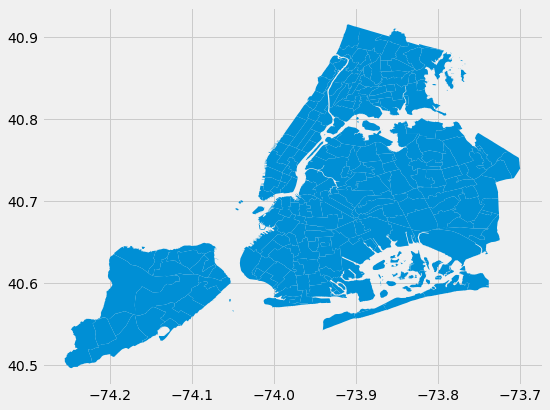

In [63]:
fig,ax=plt.subplots(1,1,figsize=(8,8))
nb.plot(ax=ax)

In [76]:
#Let's get a count by neighbourhood
nbhood_count=data.groupby('neighbourhood').agg('count').reset_index
nbhood_count

<bound method DataFrame.reset_index of                               id  name  host_id  host_name  \
neighbourhood                                                
Allerton                      42    42       42         42   
Arden Heights                  4     4        4          4   
Arrochar                      21    21       21         21   
Arverne                       77    77       77         77   
Astoria                      900   900      900        900   
Bath Beach                    17    17       17         17   
Battery Park City             70    69       70         70   
Bay Ridge                    141   141      141        141   
Bay Terrace                    6     6        6          6   
Bay Terrace, Staten Island     2     2        2          2   
Baychester                     7     7        7          7   
Bayside                       39    39       39         39   
Bayswater                     17    17       17         17   
Bedford-Stuyvesant          371

In [65]:
#find the exact location of each airbnb
data=gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data.longitude, data.latitude))
joined=pd.DataFrame.join(nb,data,how='inner')
joined.head(3)

,BoroCode,BoroName,the_geom,CountyFIPS,NTACode,NTAName,Shape_Leng,Shape_Area,geom,id,...,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,geometry
0,3,Brooklyn,MULTIPOLYGON (((-73.97604935657381 40.63127590...,47,BK88,Borough Park,39247.227831,5.400502e+07,(POLYGON ((-73.97604935657381 40.6312759056467...,2539,...,-73.97237,Private room,149,1,9,10/19/18,0.21,6,365,POINT (-73.97237 40.64749)
1,4,Queens,MULTIPOLYGON (((-73.80379022888098 40.77561011...,81,QN51,Murray Hill,33266.904797,5.248828e+07,(POLYGON ((-73.80379022888098 40.7756101122950...,2595,...,-73.98377,Entire home/apt,225,1,45,5/21/19,0.38,2,355,POINT (-73.98376999999999 40.75362)
2,4,Queens,MULTIPOLYGON (((-73.8610972440186 40.763664477...,81,QN27,East Elmhurst,19816.712074,1.972685e+07,(POLYGON ((-73.86109724401859 40.7636644770877...,3647,...,-73.94190,Private room,150,3,0,NaN,NaN,1,365,POINT (-73.9419 40.80902)


(-74.28337047814922, -73.67222994821336, 40.4751445260767, 40.93650364609704)

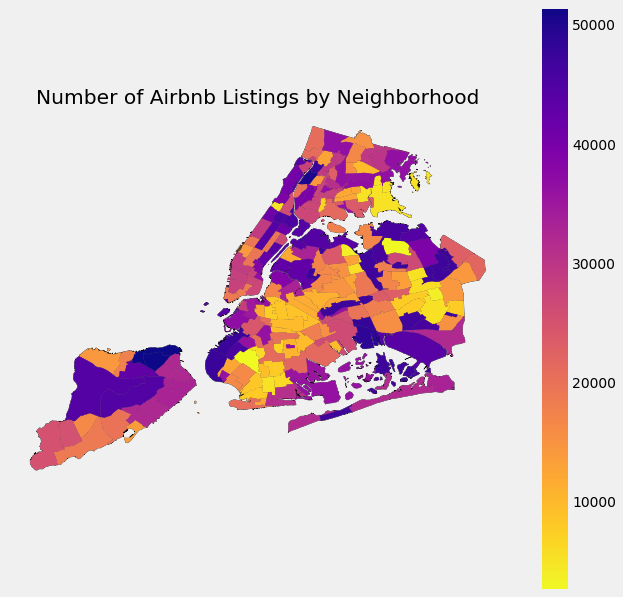

In [74]:
fig, ax=plt.subplots(1,1, figsize=(10,10))
base=nb.plot(color='white', edgecolor='black', ax=ax, figsize=(20,16))
joined.plot(column='id',cmap='plasma_r', ax=base, legend=True)
plt.title('Number of Airbnb Listings by Neighborhood')
plt.axis('off')

#### Comments: For this color map, we could identify that the different neighbourhood exhibit different number of listings, however, it is different to figure out the exact number of neighbourhood listings. 

Text(0.5, 1.0, 'Neighbourhood')

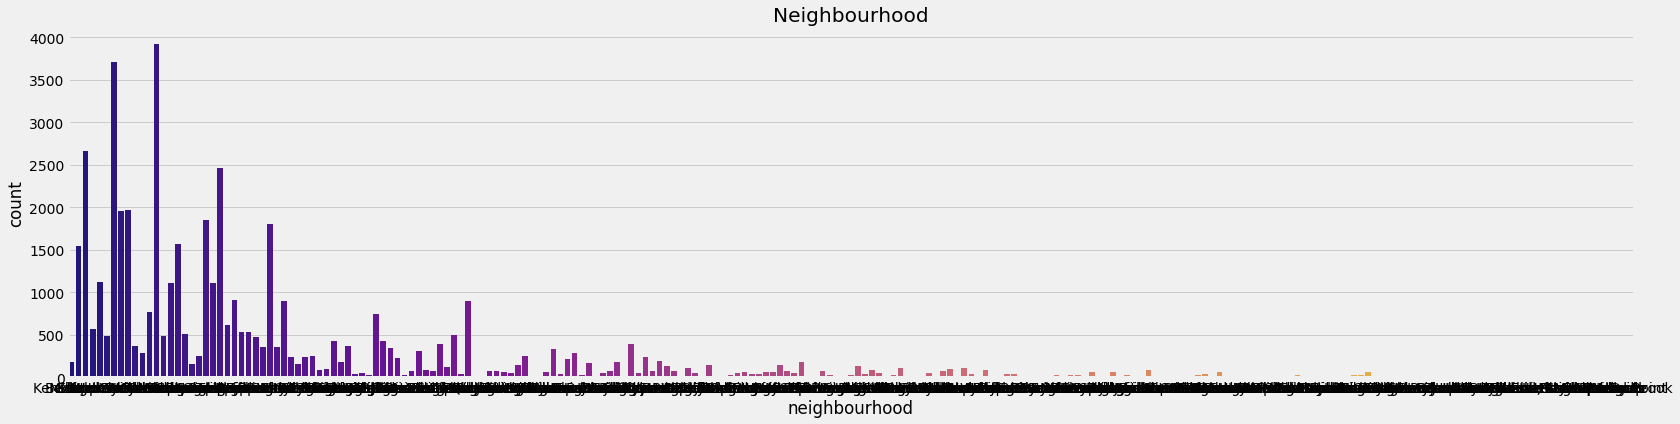

In [79]:
#employ the barplot to show the exact distribution.

sns.countplot(data['neighbourhood'], palette='plasma')
fig=plt.gcf()
fig.set_size_inches(25,6)
plt.title('Neighbourhood')

In [85]:
#Find out the top 10 neighbourhood with the most listings.
data.neighbourhood.value_counts().head(10)

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
Name: neighbourhood, dtype: int64

#### Comments: The neighbourhood with most listings is 'Williamsburg' with 3920 listings. The top 10 listings range from 3920 to 1545.

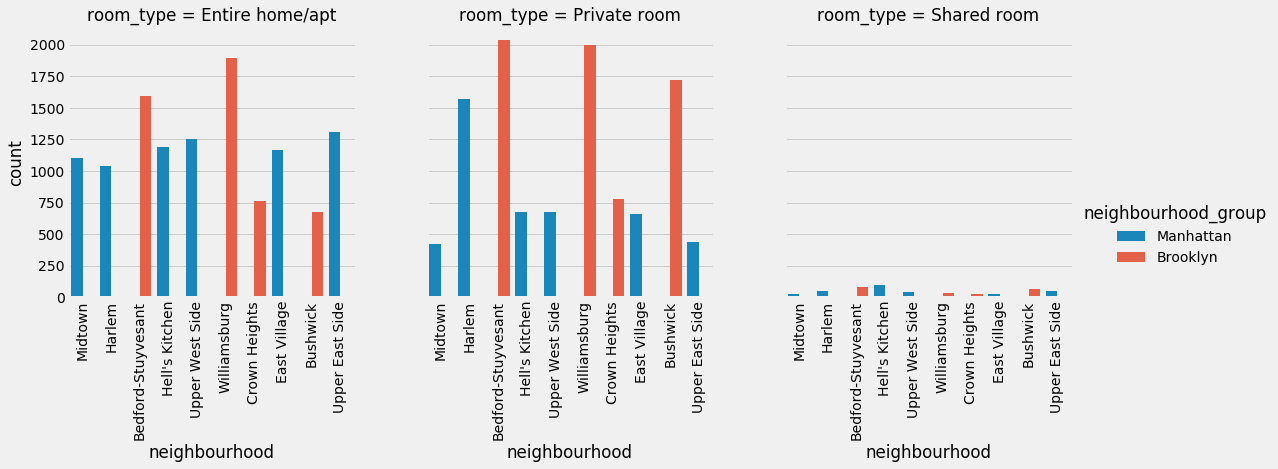

In [90]:
data2=data.loc[data['neighbourhood'].isin(['Williamsburg','Bedford-Stuyvesant','Harlem','Bushwick','Upper West Side',
                                           'Hell\'s Kitchen','East Village','Upper East Side','Crown Heights',
                                           'Midtown'])]
nb_plot=sns.catplot(x='neighbourhood', hue='neighbourhood_group', col='room_type', data=data2, kind='count')
nb_plot.set_xticklabels(rotation=90)

#### Comments: from this figure, the shared room in top 10 neighbourhood is barely available. From these neighbourhood only two neighbourhood group are represented--'Manhattan', 'Brooklyn'; maybe these two places are the most traveled destinations,therefore would have the most listing availability. We can also observe that Bedford-Stuyvesant and Williamsburg are the most popular for Manhattan borough, and Harlem for Brooklyn.

### Visualize the number of reviews

In [96]:
top_rev=data.nlargest(10, 'number_of_reviews')
print(top_rev['name'])
print(top_rev['number_of_reviews'])

11759                              Room near JFK Queen Bed
2031                            Great Bedroom in Manhattan
2030                        Beautiful Bedroom in Manhattan
2015                          Private Bedroom in Manhattan
13495                              Room Near JFK Twin Beds
10623                    Steps away from Laguardia airport
1879              Manhattan Lux Loft.Like.Love.Lots.Look !
20403    Cozy Room Family Home LGA Airport NO CLEANING FEE
4870                    Private brownstone studio Brooklyn
471                        LG Private Room/Family Friendly
Name: name, dtype: object
11759    629
2031     607
2030     597
2015     594
13495    576
10623    543
1879     540
20403    510
4870     488
471      480
Name: number_of_reviews, dtype: int64


#### Comments: the airbnb with most reviews is 'Room near JFK Queen Bed' (629 reviews). The top 10 review numbers range from 629 to 480.

In [97]:
price_avrg=top_rev.price.mean()
print('Average price per night: '+str(price_avrg))

Average price per night: 65.4


### Build the regression model

In [114]:
#Drop the useless columns
data.drop(['id','name','host_id','latitude','longitude','neighbourhood',
           'latitude','longitude','number_of_reviews'], axis=1, inplace=True)
#examing the changes
data.head(5)

,host_name,neighbourhood_group,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
0,John,Brooklyn,Private room,149,1,6,365
1,Jennifer,Manhattan,Entire home/apt,225,1,2,355
2,Elisabeth,Manhattan,Private room,150,3,1,365
3,LisaRoxanne,Brooklyn,Entire home/apt,89,1,1,194
4,Laura,Manhattan,Entire home/apt,80,10,1,0


In [115]:
#Drop the useless columns
data.drop(['host_name'], axis=1, inplace=True)
#examing the changes
data.head(5)

,neighbourhood_group,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
0,Brooklyn,Private room,149,1,6,365
1,Manhattan,Entire home/apt,225,1,2,355
2,Manhattan,Private room,150,3,1,365
3,Brooklyn,Entire home/apt,89,1,1,194
4,Manhattan,Entire home/apt,80,10,1,0


In [116]:
#Encode the input.
def Encode(data):
    for column in data.columns[data.columns.isin(['neighbourhood_group','room_type'])]:
        data[column]=data[column].factorize()[0]
    return data
data_en=Encode(data.copy())
data_en.head()

,neighbourhood_group,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
0,0,0,149,1,6,365
1,1,1,225,1,2,355
2,1,0,150,3,1,365
3,0,1,89,1,1,194
4,1,1,80,10,1,0


Index(['neighbourhood_group', 'room_type', 'price', 'minimum_nights',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

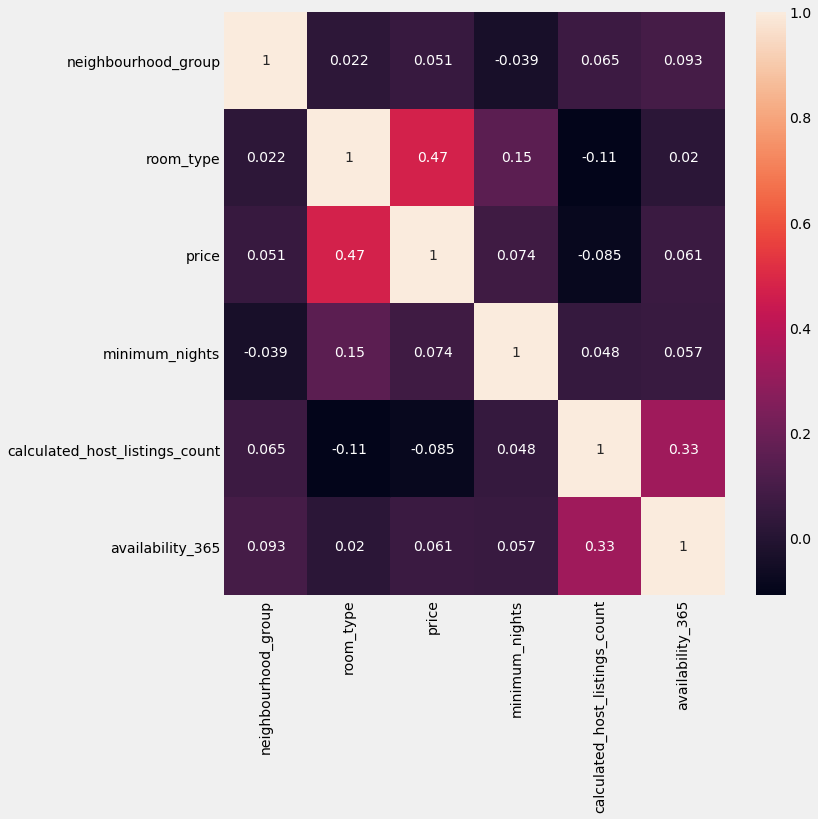

In [117]:
#Calculate the correlation index
corr=data_en.corr(method='kendall')
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True)
data.columns

#### Comments: "price" has strong correlation with "room_type" at about 0.47.

In [119]:
#Import the necessary module
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score

In [120]:
x=data_en.iloc[:,[0,1,3,4,5]]
y=data_en['price']
#getting test and training set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1, random_state=353)
print(x_train.head())
print(y_train.head())

       neighbourhood_group  room_type  minimum_nights  \
17736                    0          1               2   
24351                    1          0               5   
10069                    1          1               1   
11679                    1          0               2   
16315                    0          1               2   

       calculated_host_listings_count  availability_365  
17736                               1                 0  
24351                               1                 0  
10069                               1                 0  
11679                               1                 0  
16315                               2                 0  
17736    125
24351    101
10069    189
11679    145
16315    120
Name: price, dtype: int64


In [121]:
reg=LinearRegression()
reg.fit(x_train, y_train)
y_pred=reg.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.07480306392848757

In [122]:
#prepare a decision tree
from sklearn.tree import DecisionTreeRegressor
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.1, random_state=105)
DTree=DecisionTreeRegressor(min_samples_leaf=0.0001)
DTree.fit(x_train, y_train)
y_predict=DTree.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test, y_predict)

0.2534090076566696

### Conclusions: Based on the data analysis, we could summary airbnb data as follows:
#### 1. New York City has 5 neighbourhood_group and 195 neighbourhood.
#### 2. The host_Id '219517861' host for 327 times, which is the toppest host. The top ten counts range from 327 to 52.
#### 3. The neighbourhood_group"manhattan" exhibited the highest number of listings; 'Staten Island" exhibited the least number.
#### 4. Most airbnb are entire home/apt, more than 50%.
#### 5. The distribtuion of prices for airbnb in NYC has indicated that Neighbourhood_group 'Manhattan' has the highest price at average 150, then is Brooklyn with 90. The Bronx is the cheapest one with 65.
#### 6. The neighbourhood with most listings is 'Williamsburg' with 3920 listings. The top 10 listings range from 3920 to 1545.
#### 7. The shared room in top 10 neighbourhood is barely available. From these neighbourhood only two neighbourhood group are represented--'Manhattan', 'Brooklyn'; maybe these two places are the most traveled destinations,therefore would have the most listing availability. We can also observe that Bedford-Stuyvesant and Williamsburg are the most popular for Manhattan borough, and Harlem for Brooklyn.
#### 8. The decision tree model showed r^2 score is 0.2534.

## End